In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 3
Deadline: Sunday, 14 January 2024, 23:59 IST

Name: Anshuman Singh
Roll Number: 220176
IITK Email: anshumans22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Train a neural network on tensorflow for the given data
2. Train a decision tree with sklearn for the given data
3. Make predictions using the ensemble (average) of the two datasets
4. Report the error for the the neural network, decision tree and the ensemble.
5. Use Sampling with replacement to increase the data size by 15 percent.
6. Use 15% of the increased data set as the test data.

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook.

"""

Saving train_weekthree.csv to train_weekthree (3).csv
Epoch 1/10
24/24 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.6320
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7387
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7360
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7653
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4968 - accuracy: 0.7667
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.7627
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7760
Epoch 8/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7747
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.7760
Epoch 10/10
24/24 [==============================] - 0s 3ms/step

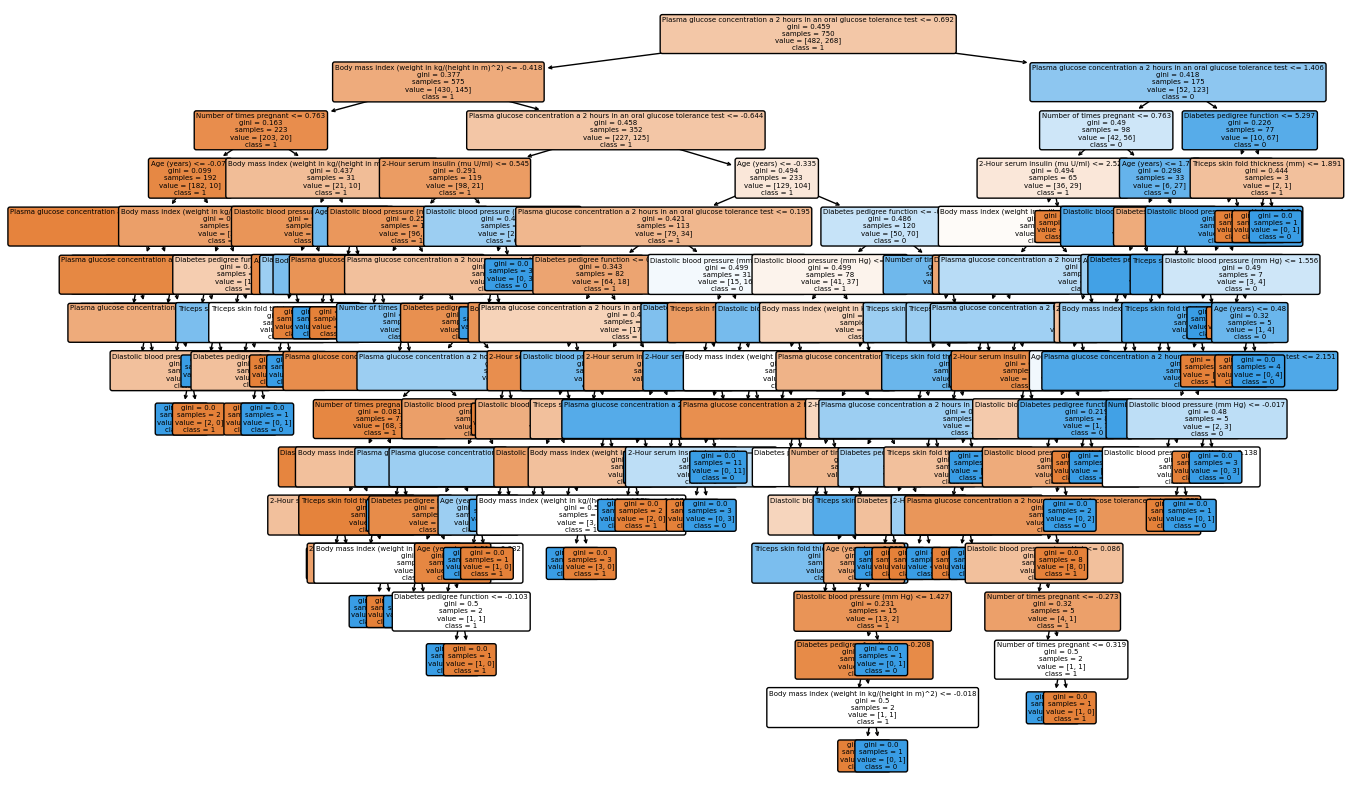

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:  [[91  3]
 [17 22]]
Accuracy :  84.9624060150376
Report :                precision    recall  f1-score   support

           0       0.84      0.97      0.90        94
           1       0.88      0.56      0.69        39

    accuracy                           0.85       133
   macro avg       0.86      0.77      0.79       133
weighted avg       0.85      0.85      0.84       133


Neural Network Accuracy: 85.71428571428571
MAE for Neural Network: 0.14285714285714285
MSE for Neural Network: 0.14285714285714285
RMSE for Neural Network: 0.3779644730092272

Decision Tree Accuracy: 81.95488721804512
MAE for Decision Tree: 0.18045112781954886
MSE for Decision Tree: 0.18045112781954886
RMSE for Decision Tree: 0.4247953952428732

Ensemble Accuracy: 84.9624060150376
MAE for Ensemble: 0.15037593984962405
MSE for Ensemble: 0.15037593984962405
RMSE for Ensemble: 0.38778336716474066


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('train_weekthree.csv')
df.head()
# Use Sampling with replacement to increase the data size by 15 percent.
original_size = len(df)
sample_size = int(0.15 * original_size)
increased_data = df.sample(n=sample_size, replace=True)
df = pd.concat([df, increased_data], ignore_index=True)

ind = df.drop('Class variable (0 or 1)',axis='columns')
target = df['Class variable (0 or 1)']

# Use 15% of the increased data set as the test data.
X_train, X_test, y_train, y_test = train_test_split(ind, target, test_size=0.15, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a neural network on tensorflow for the given data
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
                                    tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100}")

# Train a decision tree with sklearn for the given data
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)
print("Report : ",classification_report(y_test, y_pred))
features = ['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)'
             ,'Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)']
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=features, class_names=target.astype(str), rounded=True,fontsize=5)
plt.show()

pred_neural = model.predict(X_test)
pred_neural = pred_neural.flatten()
pred_neural = (pred_neural > 0.5).astype(int)

# Make predictions using the ensemble (average) of the two datasets
ensemble_pred = ((pred_neural + y_pred) / 2).astype(int)

print("Confusion Matrix: ",confusion_matrix(y_test, ensemble_pred))
print("Accuracy : ",accuracy_score(y_test, ensemble_pred)*100)
print("Report : ",classification_report(y_test, ensemble_pred))
print()

# Report the error for the the neural network, decision tree and the ensemble.
accu_neural = accuracy_score(y_test, pred_neural)
print(f"Neural Network Accuracy: {accu_neural*100}")
print("MAE for Neural Network:",mean_absolute_error(y_test,pred_neural))
print("MSE for Neural Network:",mean_squared_error(y_test,pred_neural))
print("RMSE for Neural Network:",np.sqrt(mean_squared_error(y_test,pred_neural)))
print()

accu_dec_tree = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accu_dec_tree*100}")
print("MAE for Decision Tree:",mean_absolute_error(y_test,y_pred))
print("MSE for Decision Tree:",mean_squared_error(y_test,y_pred))
print("RMSE for Decision Tree:",np.sqrt(mean_squared_error(y_test,y_pred)))
print()

accu_ensemble = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy: {accu_ensemble*100}")
print("MAE for Ensemble:",mean_absolute_error(y_test,ensemble_pred))
print("MSE for Ensemble:",mean_squared_error(y_test,ensemble_pred))
print("RMSE for Ensemble:",np.sqrt(mean_squared_error(y_test,ensemble_pred)))